
# Analyzation Of 911 Calls 

In [193]:
import pandas as pd

In [194]:
import numpy as np

In [195]:
import seaborn as sns

In [196]:
%matplotlib inline

In [197]:
import matplotlib.pyplot as plt

In [198]:
df=pd.read_csv('Desktop/911.csv')

### Conversion Of Datetime Object into DatetimeIndex

In [199]:
df['timeStamp']=pd.DatetimeIndex(df['timeStamp'])

### Adding Day col.

In [200]:
def datetime(date):
    return date.day

In [201]:
df['day']=df['timeStamp'].apply(datetime)

### Adding Day Of Week Col.

In [202]:
def week(week):
    return week.dayofweek

In [203]:
df['day of the week']=df['timeStamp'].apply(week)

In [204]:
dow={1:'MON',2:'TUE',3:'WED',4:'THR',5:'FRI',6:'SAT',7:'SUN'}

In [205]:
df['day of the week']=df['day of the week'].map(dow)

### Adding Hour Col.

In [206]:
def hour(hour):
    return hour.hour

In [207]:
df['hour']=df['timeStamp'].apply(hour)

### Adding Reason And Cause col.

In [208]:
df['reason']=df['title'].apply(lambda x : x.split(':')[0])

In [209]:
df['cause']=df['title'].apply(lambda x : x.split(':')[1])

### Extracting Important Data Only

In [210]:
DF=df[['reason','cause','day','hour','day of the week']]

## No. OF Calls BY Reason

In [211]:
DF['reason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: reason, dtype: int64

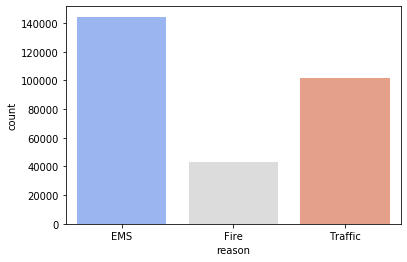

In [212]:
sns.countplot(DF['reason'],palette='coolwarm')

## NO. OF Calls Per Day

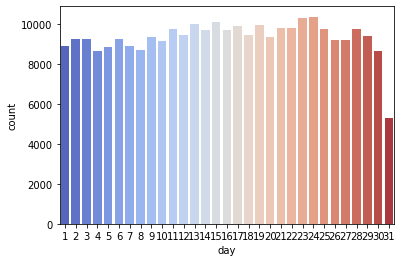

In [213]:
sns.countplot(x='day',data=DF,palette='coolwarm')

## NO. Of Calls Per Day OF Week By Reason

In [214]:
DF['day of the week'].value_counts()

THR    44468
MON    43744
TUE    43442
WED    42784
FRI    38637
SAT    34073
Name: day of the week, dtype: int64

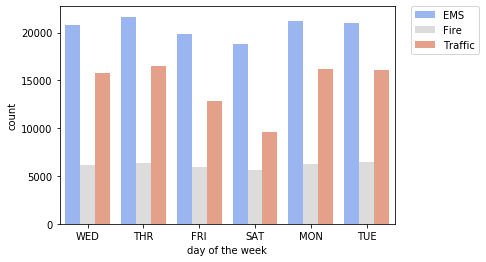

In [215]:
sns.countplot(x='day of the week',data=DF,palette='coolwarm',hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Calls In The Hours Of The Week

In [216]:
DC=DF.pivot_table(columns='day of the week',index='hour')

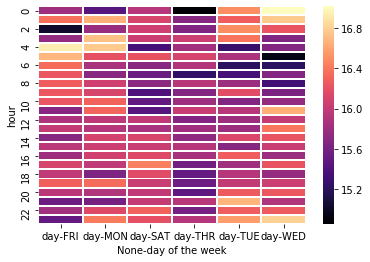

In [217]:
sns.heatmap(DC,linewidths=1,cmap='magma',linecolor='white')